In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Excel file
df = pd.read_excel("india_weather_data.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131055 entries, 0 to 131054
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       118202 non-null  datetime64[ns]
 1   latitude                   117910 non-null  float64       
 2   longitude                  117768 non-null  float64       
 3   wind_speed                 117886 non-null  float64       
 4   cloud_cover                118072 non-null  float64       
 5   precipitation_probability  117821 non-null  float64       
 6   pressure_surface_level     117806 non-null  float64       
 7   dew_point                  118175 non-null  float64       
 8   uv_index                   117737 non-null  float64       
 9   heatwave                   117855 non-null  float64       
 10  visibility                 117974 non-null  float64       
 11  rainfall                   118006 non-null  float64 

In [5]:
df.head()

date  latitude  longitude  wind_speed  cloud_cover  \
0 2023-01-01   28.6139    77.2090    0.428064    56.787047   
1 2023-01-01   19.0760    72.8777   13.603933    36.321945   
2 2023-01-01   12.9716    77.5946  100.000000    49.585297   
3 2023-01-01   22.5726    88.3639    2.785259    21.462155   
4 2023-01-01       NaN    80.2707    9.399230          NaN   

   precipitation_probability  pressure_surface_level  dew_point  uv_index  \
0                  89.803147             1003.885666  29.282458  6.353398   
1                  75.198203              500.000000        NaN  6.653509   
2                  60.621663             1001.774831  31.567394  5.976996   
3                  38.284893              993.455514  29.974869  7.757285   
4                  21.538080             1020.945313  25.815398  3.376130   

   heatwave  visibility   rainfall  solar_radiation  snowfall  \
0       0.0    0.827196  34.565602              NaN       0.0   
1       0.0    8.040858        NaN       944.176384       0.0   
2       0.0    6.776773   0.212155       451.964858       0.0   
3       0.0    5.783869   0.389140       743.226528       0.0   
4       0.0    8.133818   0.000000       493.243162       0.0   

   max_temperature  min_temperature  max_humidity  min_humidity  
0       104.379272        96.475944     25.221215     17.901661  
1        38.198134        32.485543     86.025179     74.403003  
2        37.908737              NaN     65.569945     52.094434  
3        33.755248        32.350385     69.260757     61.289844  
4        32.172688        27.963711     81.054374     75.400783

In [6]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 date                         12853
latitude                     13145
longitude                    13287
wind_speed                   13169
cloud_cover                  12983
precipitation_probability    13234
pressure_surface_level       13249
dew_point                    12880
uv_index                     13318
heatwave                     13200
visibility                   13081
rainfall                     13049
solar_radiation              12996
snowfall                     13049
max_temperature              12875
min_temperature              13113
max_humidity                 12940
min_humidity                 13130
dtype: int64


In [7]:
# Drop columns with excessive missing values (e.g., more than 40%)
threshold = 0.4 * len(df)
df = df.dropna(axis=1, thresh=threshold)

In [8]:
# Fill missing values in numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [9]:
# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    if not df[col].dropna().empty:  # Check if column has any non-null values
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode if exists
    else:
        df[col].fillna("Unknown", inplace=True)  # Fill with a default value


In [10]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [11]:
# Check for conversion errors
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131055 entries, 0 to 131054
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       118202 non-null  datetime64[ns]
 1   latitude                   131055 non-null  float64       
 2   longitude                  131055 non-null  float64       
 3   wind_speed                 131055 non-null  float64       
 4   cloud_cover                131055 non-null  float64       
 5   precipitation_probability  131055 non-null  float64       
 6   pressure_surface_level     131055 non-null  float64       
 7   dew_point                  131055 non-null  float64       
 8   uv_index                   131055 non-null  float64       
 9   heatwave                   131055 non-null  float64       
 10  visibility                 131055 non-null  float64       
 11  rainfall                   131055 non-null  float64 

In [12]:
df = df.drop_duplicates()
df.shape

(118380, 18)

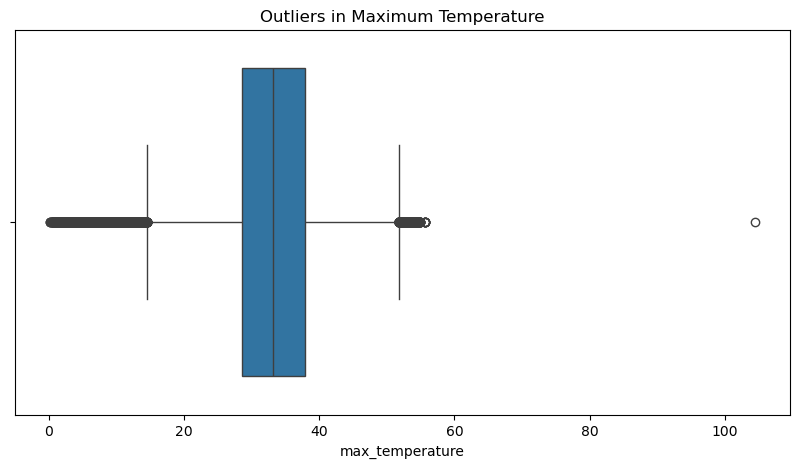

Outliers removed. New shape: (113748, 18)


In [13]:


# Boxplot to visualize outliers in temperature
plt.figure(figsize=(10,5))
sns.boxplot(x=df['max_temperature'])
plt.title("Outliers in Maximum Temperature")
plt.show()

# Remove extreme outliers using IQR method
Q1 = df['max_temperature'].quantile(0.25)
Q3 = df['max_temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['max_temperature'] >= lower_bound) & (df['max_temperature'] <= upper_bound)]

print("Outliers removed. New shape:", df.shape)


In [14]:
df.to_csv("cleaned_india_weather_data.csv", index=False)

# Load CSV file
csv_file = "cleaned_india_weather_data.csv"  # Replace with your CSV file name
df = pd.read_csv(csv_file)

# Convert and save as Excel file
excel_file = "india_weather_data_urban.xlsx"  # Name of the output Excel file
df.to_excel(excel_file, index=False, engine='openpyxl')

print("CSV successfully converted to Excel!")

CSV successfully converted to Excel!


In [15]:
df1 = pd.read_excel("india_weather_data_urban.xlsx")

In [16]:
df1.columns

Index(['date', 'latitude', 'longitude', 'wind_speed', 'cloud_cover',
       'precipitation_probability', 'pressure_surface_level', 'dew_point',
       'uv_index', 'heatwave', 'visibility', 'rainfall', 'solar_radiation',
       'snowfall', 'max_temperature', 'min_temperature', 'max_humidity',
       'min_humidity'],
      dtype='object')

In [17]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')  # Convert to datetime
df1['Month'] = df1['date'].dt.month  # Extract month

In [18]:
# Group by Month and Latitude/Longitude and calculate mean temperature
heatmap_data = df1.pivot_table(index="latitude", columns="Month", values="max_temperature", aggfunc="mean")

# Display the first few rows
print(heatmap_data.head())

Month          1.0        2.0        3.0        4.0        5.0        6.0   \
latitude                                                                     
11.0168   28.007652  27.940625  27.946250  28.123159  27.984399  28.031606   
12.9716   27.912786  27.905965  28.054078  27.291931  27.919803  27.686882   
13.0827   35.108091  35.055504  34.931856  34.544102  34.597249  35.002110   
15.2993   34.873916  34.771496  35.148130  34.990767  34.604204  34.689270   
19.0760   34.637781  34.734379  34.899746  34.831939  34.849209  34.774216   

Month          7.0        8.0        9.0        10.0       11.0       12.0  
latitude                                                                    
11.0168   28.038299  27.834407  27.972034  27.687756  28.395980  28.395068  
12.9716   28.135079  27.928887  27.773705  27.920644  27.962500  28.240703  
13.0827   34.367268  35.045174  34.639165  34.597583  34.991472  34.747803  
15.2993   35.035154  34.901035  34.811884  34.906962  34.543896  34.

In [19]:
#hypothesis testing on temperature differences 
import scipy.stats as stats

# Select two groups based on location (e.g., North vs South India)
region1 = df1[df1['latitude'] > 20]['max_temperature']  # Northern Region
region2 = df1[df1['latitude'] <= 20]['max_temperature']  # Southern Region

# Remove NaN values
region1 = region1.dropna()
region2 = region2.dropna()

# Perform Independent T-test
t_stat, p_value = stats.ttest_ind(region1, region2)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret Results
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in temperatures.")
else:
    print("Fail to Reject Null Hypothesis: No significant temperature difference.")


T-Statistic: 56.58680019322334
P-Value: 0.0
Reject Null Hypothesis: There is a significant difference in temperatures.


In [20]:
#Performing Hypothesis Test for Seasonal Temperature Differences
# Convert 'date' column to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Extract months to define summer (March–June) and winter (Nov–Feb)
summer = df1[df1['date'].dt.month.isin([3, 4, 5, 6])]['max_temperature']
winter = df1[df1['date'].dt.month.isin([11, 12, 1, 2])]['max_temperature']

# Remove NaN values
summer = summer.dropna()
winter = winter.dropna()

# Perform Independent T-test
t_stat, p_value = stats.ttest_ind(summer, winter)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject Null Hypothesis: Temperature varies significantly between seasons.")
else:
    print("Fail to Reject Null Hypothesis: No significant seasonal temperature difference.")


T-Statistic: -0.4260758840640637
P-Value: 0.6700538626729526
Fail to Reject Null Hypothesis: No significant seasonal temperature difference.


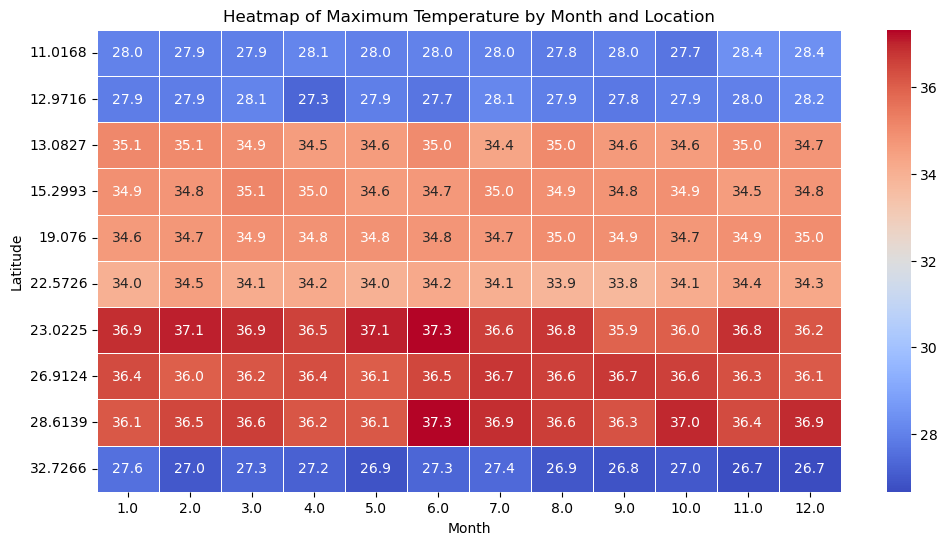

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Heatmap of Maximum Temperature by Month and Location")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

In [22]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load your cleaned weather dataset
df = pd.read_csv("cleaned_india_weather_data.csv")

# Remove missing values
df = df.dropna(subset=['latitude', 'longitude', 'max_temperature'])

min_lat, max_lat = df['latitude'].min(), df['latitude'].max()
min_lon, max_lon = df['longitude'].min(), df['longitude'].max()

# Create a base map centered around India
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

# Prepare data for the heatmap
heat_data = list(zip(df['latitude'], df['longitude'], df['max_temperature']))

# Add heatmap layer to the map
HeatMap(heat_data, radius=20, blur=10).add_to(m)
m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

# Display the map in Jupyter Notebook
m